# Matplotlib and Seaborn project - Analysing a dataset about traffic conditions on an American Interstate highway

The aim of this project is to demonstrate some of the skills I have picked up learning both data visualisation libraries. 

The goal of the analysis is to determine indicators of heavy traffic on I-94 (American interstate highway) https://en.wikipedia.org/wiki/Interstate_94

The dataset documentation can be found here: https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume

and states:
- station located midway on the interstate, between two cities, Minneapolis and Saint Paul
- station only records westbound traffic


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set() #had to include this on jupyter as wouldn't allow me to use sns.set_theme() ?


In [2]:
interstate = pd.read_csv('../input/metro-interstate-traffic-volume/Metro_Interstate_Traffic_Volume.csv')

In [3]:
interstate

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918
...,...,...,...,...,...,...,...,...,...
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450


From the above, we can tell the dataset ranges from 2012-10-02 09:00:00 to 2018-09-30 23:00:00 	

In [4]:
interstate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


# Exploring date and time
First, i'll create some graphs for myself in order to explore the data and find patterns.

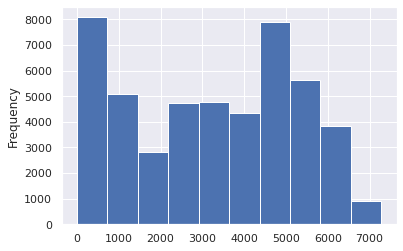

In [5]:
interstate['traffic_volume'].plot.hist()
plt.show()

In [6]:
interstate['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

From the data above:
- from 2012-10-02 09:00:00 to 2018-09-30 23:00:00, the amount of cars varied from 0 to 7280
- the histogram shows asymmetrical distribition
- the mean amount of cars is 3259
- some days had 0 traffic
- 25% of the time, there was 4933 or more cars; contrasting this with 25% of the time there was 1193 or fewer

When the amount of cars reached 4933 or more, this could have been during peak traffic during the day, i.e. daily commute in or out of the city for work.

When the amount of cars passing the station reached 1193 or fewer, this could have been accounted for by differences in time; we would expect fewer cars on the roads during nighttime. 

This gives a good basis for segregating the data into two parts: nighttime and daytime

### Converting date_time column into datetime datatype

In [7]:
interstate['date_time'] = pd.to_datetime(interstate['date_time'])

In [8]:
interstate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   holiday              48204 non-null  object        
 1   temp                 48204 non-null  float64       
 2   rain_1h              48204 non-null  float64       
 3   snow_1h              48204 non-null  float64       
 4   clouds_all           48204 non-null  int64         
 5   weather_main         48204 non-null  object        
 6   weather_description  48204 non-null  object        
 7   date_time            48204 non-null  datetime64[ns]
 8   traffic_volume       48204 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 3.3+ MB


### Isolating daytime and nighttime data
divide equally between 12 hours:
- 7am - 7pm
- 7pm to 7am

In [9]:
interstate['date_time'].dt.hour.unique()

array([ 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23,  0,  1,
        2,  3,  4,  5,  6,  8,  7])

In [10]:
daytime_data = interstate.copy()[(interstate['date_time'].dt.hour >= 7) & (interstate['date_time'].dt.hour < 19)]

In [11]:
nighttime_data = interstate.copy()[(interstate['date_time'].dt.hour >= 19) | (interstate['date_time'].dt.hour < 7)]
#if either are true

In [12]:
daytime_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23877 entries, 0 to 48198
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   holiday              23877 non-null  object        
 1   temp                 23877 non-null  float64       
 2   rain_1h              23877 non-null  float64       
 3   snow_1h              23877 non-null  float64       
 4   clouds_all           23877 non-null  int64         
 5   weather_main         23877 non-null  object        
 6   weather_description  23877 non-null  object        
 7   date_time            23877 non-null  datetime64[ns]
 8   traffic_volume       23877 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 1.8+ MB


In [13]:
nighttime_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24327 entries, 10 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   holiday              24327 non-null  object        
 1   temp                 24327 non-null  float64       
 2   rain_1h              24327 non-null  float64       
 3   snow_1h              24327 non-null  float64       
 4   clouds_all           24327 non-null  int64         
 5   weather_main         24327 non-null  object        
 6   weather_description  24327 non-null  object        
 7   date_time            24327 non-null  datetime64[ns]
 8   traffic_volume       24327 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 1.9+ MB


### Creating histogram (in grid) to compare daytime and nighttime traffic

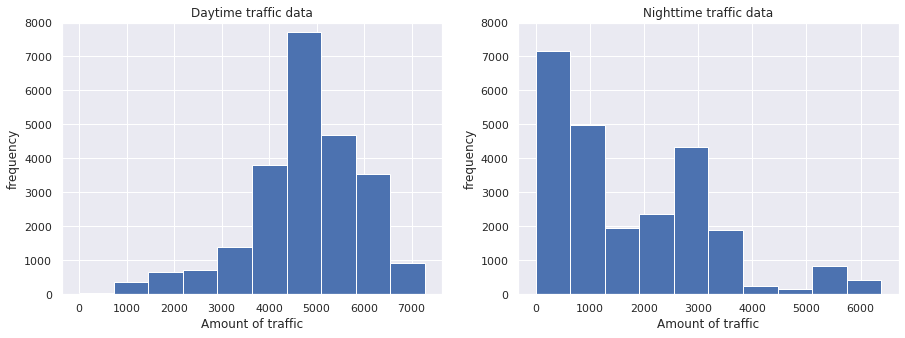

In [14]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.hist(daytime_data['traffic_volume'])
plt.title('Daytime traffic data')
plt.xlabel('Amount of traffic')
plt.ylabel('frequency')
plt.ylim([0, 8000])

plt.subplot(1, 2, 2)
plt.hist(nighttime_data['traffic_volume'])
plt.title('Nighttime traffic data')
plt.xlabel('Amount of traffic')
plt.ylabel('frequency')
plt.ylim([0, 8000])

plt.show()

In [15]:
daytime_data['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [16]:
nighttime_data['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

**Observations:**
- traffic is typically heavier during the daytime, having an average higher amount of cars on the interstate
- 75% of the time, traffic is higher than 4252 cars, as only 25% of the time do car numbers drop below 4252
- daytime traffic is left-skewed, meaning most values are generally high
- nighttime traffic is right-skewed, meaning most values are generally low

Further analysis should focus on daytime traffic, as this is when traffic is heavier. Though there are still moments during the nighttime when traffic reaches high numbers - but common indicators should appear within the daytime part.

### Visualising data changes based on time parameters
- month
- day of the week
- time of day

As peak movement may be influenced by these behaviours, e.g. I expect higher traffic numbers when people commute to and from work, more traffic during summer months. Potentially higher during weekday around the above times, too. 

In [17]:
daytime_data['month'] = daytime_data['date_time'].dt.month
by_month_day = daytime_data.groupby('month').mean()
by_month_day['traffic_volume']

month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

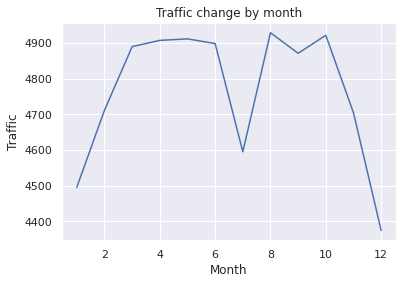

In [18]:
plt.plot(by_month_day['traffic_volume'])
plt.title("Traffic change by month")
plt.xlabel("Month")
plt.ylabel("Traffic")
plt.show()

In [19]:
daytime_data['year'] = daytime_data['date_time'].dt.year
by_year_day = daytime_data.groupby('year').mean()
by_year_day['traffic_volume']

year
2012    4675.346861
2013    4834.084298
2014    4765.309296
2015    4748.448485
2016    4637.518293
2017    4865.961752
2018    4726.280534
Name: traffic_volume, dtype: float64

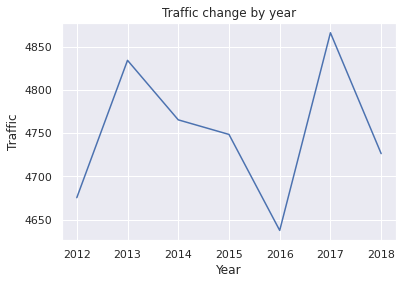

In [20]:
plt.plot(by_year_day['traffic_volume'])
plt.title("Traffic change by year")
plt.xlabel("Year")
plt.ylabel("Traffic")
plt.show()

In [21]:
daytime_data['hour'] = daytime_data['date_time'].dt.hour
by_hour_day = daytime_data.groupby('hour').mean()
by_hour_day['traffic_volume']

hour
7     4740.181337
8     4587.497115
9     4385.277502
10    4184.665544
11    4465.877561
12    4718.293095
13    4714.940682
14    4931.888776
15    5240.524302
16    5663.756539
17    5310.076048
18    4263.718530
Name: traffic_volume, dtype: float64

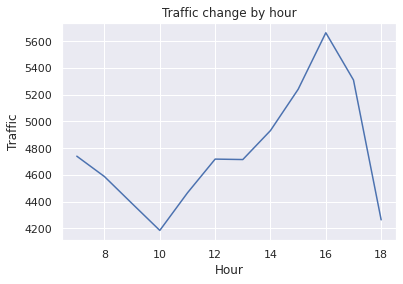

In [22]:
plt.plot(by_hour_day['traffic_volume'])
plt.title("Traffic change by hour")
plt.xlabel("Hour")
plt.ylabel("Traffic")
plt.show()

### Creating a grid chart of all the above line graphs, just to make comparison easier

In [23]:
daytime_data['dayofweek'] = daytime_data['date_time'].dt.dayofweek
by_dayofweek = daytime_data.groupby('dayofweek').mean()
by_dayofweek['traffic_volume']  # 0 is Monday, 6 is Sunday

dayofweek
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

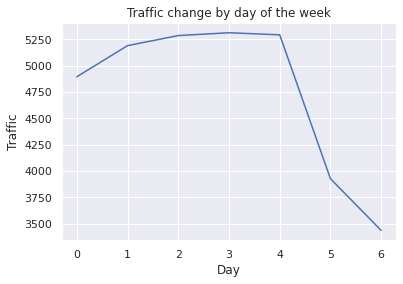

In [24]:
plt.plot(by_dayofweek['traffic_volume'])
plt.title("Traffic change by day of the week")
plt.xlabel("Day")
plt.ylabel("Traffic")
plt.show()

<Figure size 432x288 with 0 Axes>

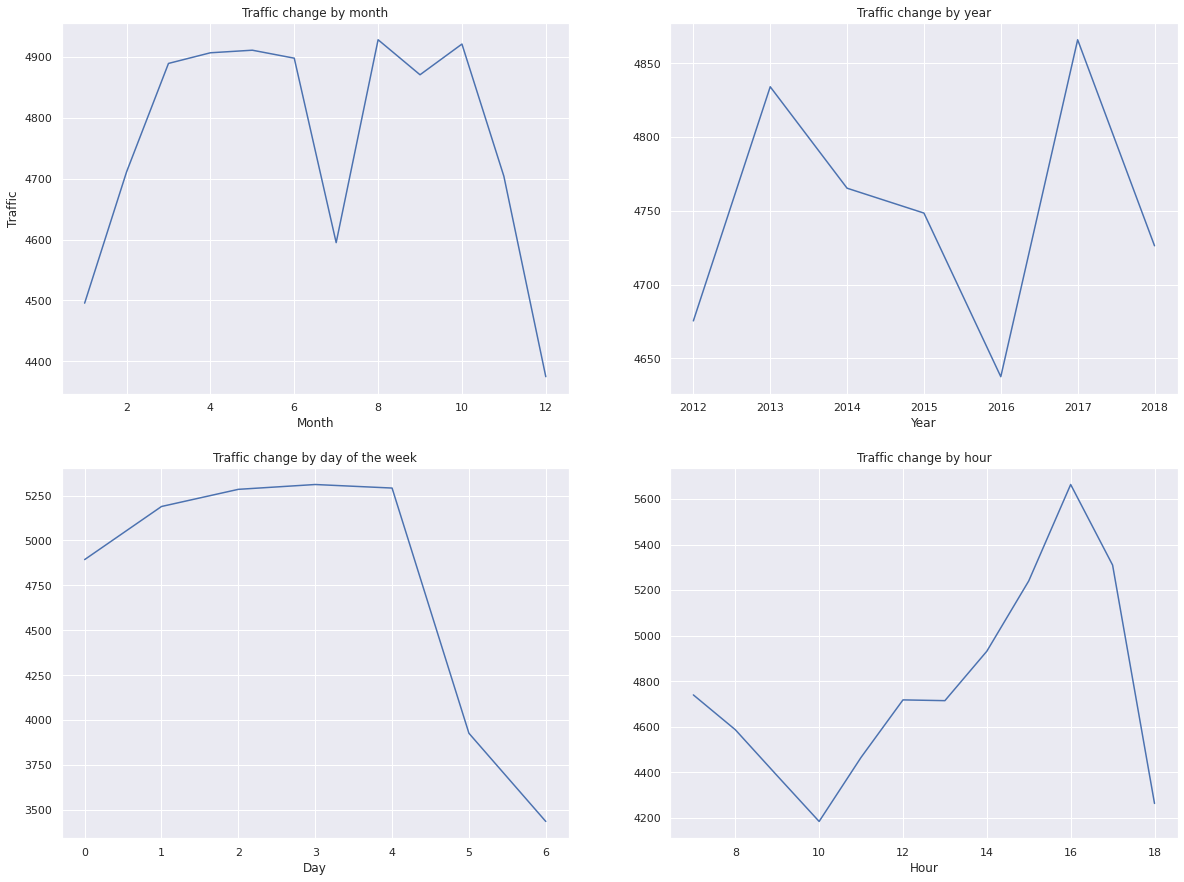

In [25]:
plt.figure()
plt.figure(figsize=(20, 15))
plt.subplot(2, 2, 1)
plt.plot(by_month_day['traffic_volume'])
plt.title("Traffic change by month")
plt.xlabel("Month")
plt.ylabel("Traffic")


plt.subplot(2, 2, 2)
plt.plot(by_year_day['traffic_volume'])
plt.title("Traffic change by year")
plt.xlabel("Year")

plt.subplot(2, 2, 3)
plt.plot(by_dayofweek['traffic_volume'])
plt.title("Traffic change by day of the week")
plt.xlabel("Day")

plt.subplot(2, 2, 4)
plt.plot(by_hour_day['traffic_volume'])
plt.title("Traffic change by hour")
plt.xlabel("Hour")

plt.show()

**Observations**

**by month:**
- less traffic during the colder, winter months
- Also a drop in traffic during July - a summer month. unexpected

**by year:**
- a drop in the year 2016 and lower traffic in 2012
- sharp increase in traffic in 2017 (highest recording)

**by day:**
- as expected, weekdays are the busiest as they conform to the typical work week schedule Mon-Fri
- significant reduction in traffic on Sat and Sun

**by hour:**
- fewer cars around 10am, and 6pm
- interstate has heavy traffic from 4pm to 5pm
- traffic steadily increases from 2pm to 4pm, where it reaches its peak

### Splitting dataset by weekday - working week and weekend
- the by hour traffic is going to be skewing the data and bringing down the average values
- will look at working week and weekend values separately

In [26]:
daytime_data['hour'] = daytime_data['date_time'].dt.hour
bussiness_days = daytime_data.copy()[daytime_data['dayofweek'] <= 4] # 4 == Friday, due to indexing starting at 0
weekend = daytime_data.copy()[daytime_data['dayofweek'] >= 5] # 5 == Saturday
by_hour_business = bussiness_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

print(by_hour_business['traffic_volume'])
print(by_hour_weekend['traffic_volume'])

hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64
hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64


(1500.0, 6250.0)

<Figure size 432x288 with 0 Axes>

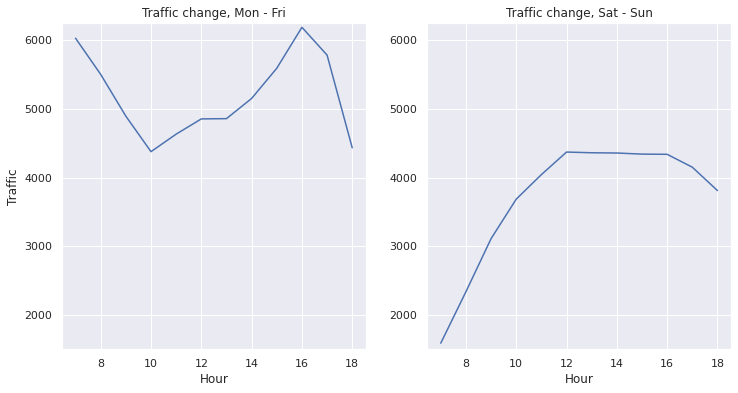

In [27]:
plt.figure()
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(by_hour_business['traffic_volume'])
plt.title("Traffic change, Mon - Fri")
plt.xlabel("Hour")
plt.ylim([1500, 6250])
plt.ylabel("Traffic")

plt.subplot(1, 2, 2)
plt.plot(by_hour_weekend['traffic_volume'])
plt.title("Traffic change, Sat - Sun")
plt.xlabel("Hour")
plt.ylim([1500, 6250])



**Observations:**

**Mon-Fri**
- peak hours are 7am and 4pm, which are typical times to begin commute for work
- reduction in traffic around 10am and 6pm, the times when people are usually at work
- highest peak is >6000 cars

**Sat-Sun**
- traffic numbers are low until 10am, when traffic begins to increase
- traffic peaks at 12pm, at approximately 4500 cars

# Exploring correlations between traffic and weather (numerical values)

In [28]:
daytime_data.corr()['traffic_volume']

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
month            -0.022337
year             -0.003557
hour              0.172704
dayofweek        -0.416453
Name: traffic_volume, dtype: float64

temperature seems to have the strongest correlation with traffic volume out of all the 'weather' columns

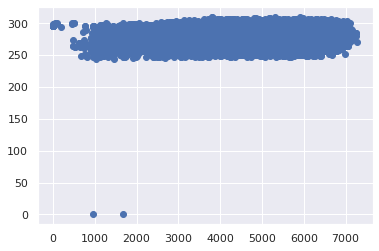

In [29]:
plt.scatter(daytime_data['traffic_volume'], daytime_data['temp'])
plt.show()
#plotting like this but two anomalous results made ruined the graph by condensing bulk of results as below

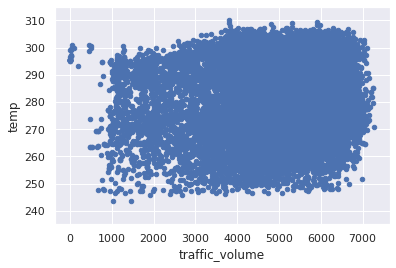

In [30]:
daytime_data.plot.scatter(x='traffic_volume', #also took advantage of pandas shorthand 'df.plot'
                          y='temp')
plt.ylim([235,315])
plt.show()

**Observation:** because of the distribution of values, I don't think temperature is a good indicator of traffic

# Exploring correlations between traffic and weather (categorical values)

In [31]:
by_weather_main = daytime_data.groupby('weather_main').mean()
by_weather_description = daytime_data.groupby('weather_description').mean()

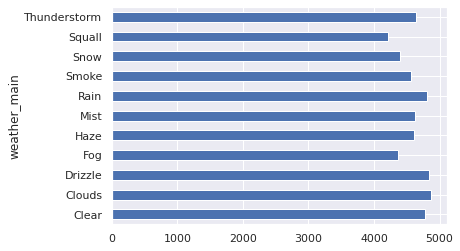

In [32]:
by_weather_main['traffic_volume'].plot.barh()
plt.show()

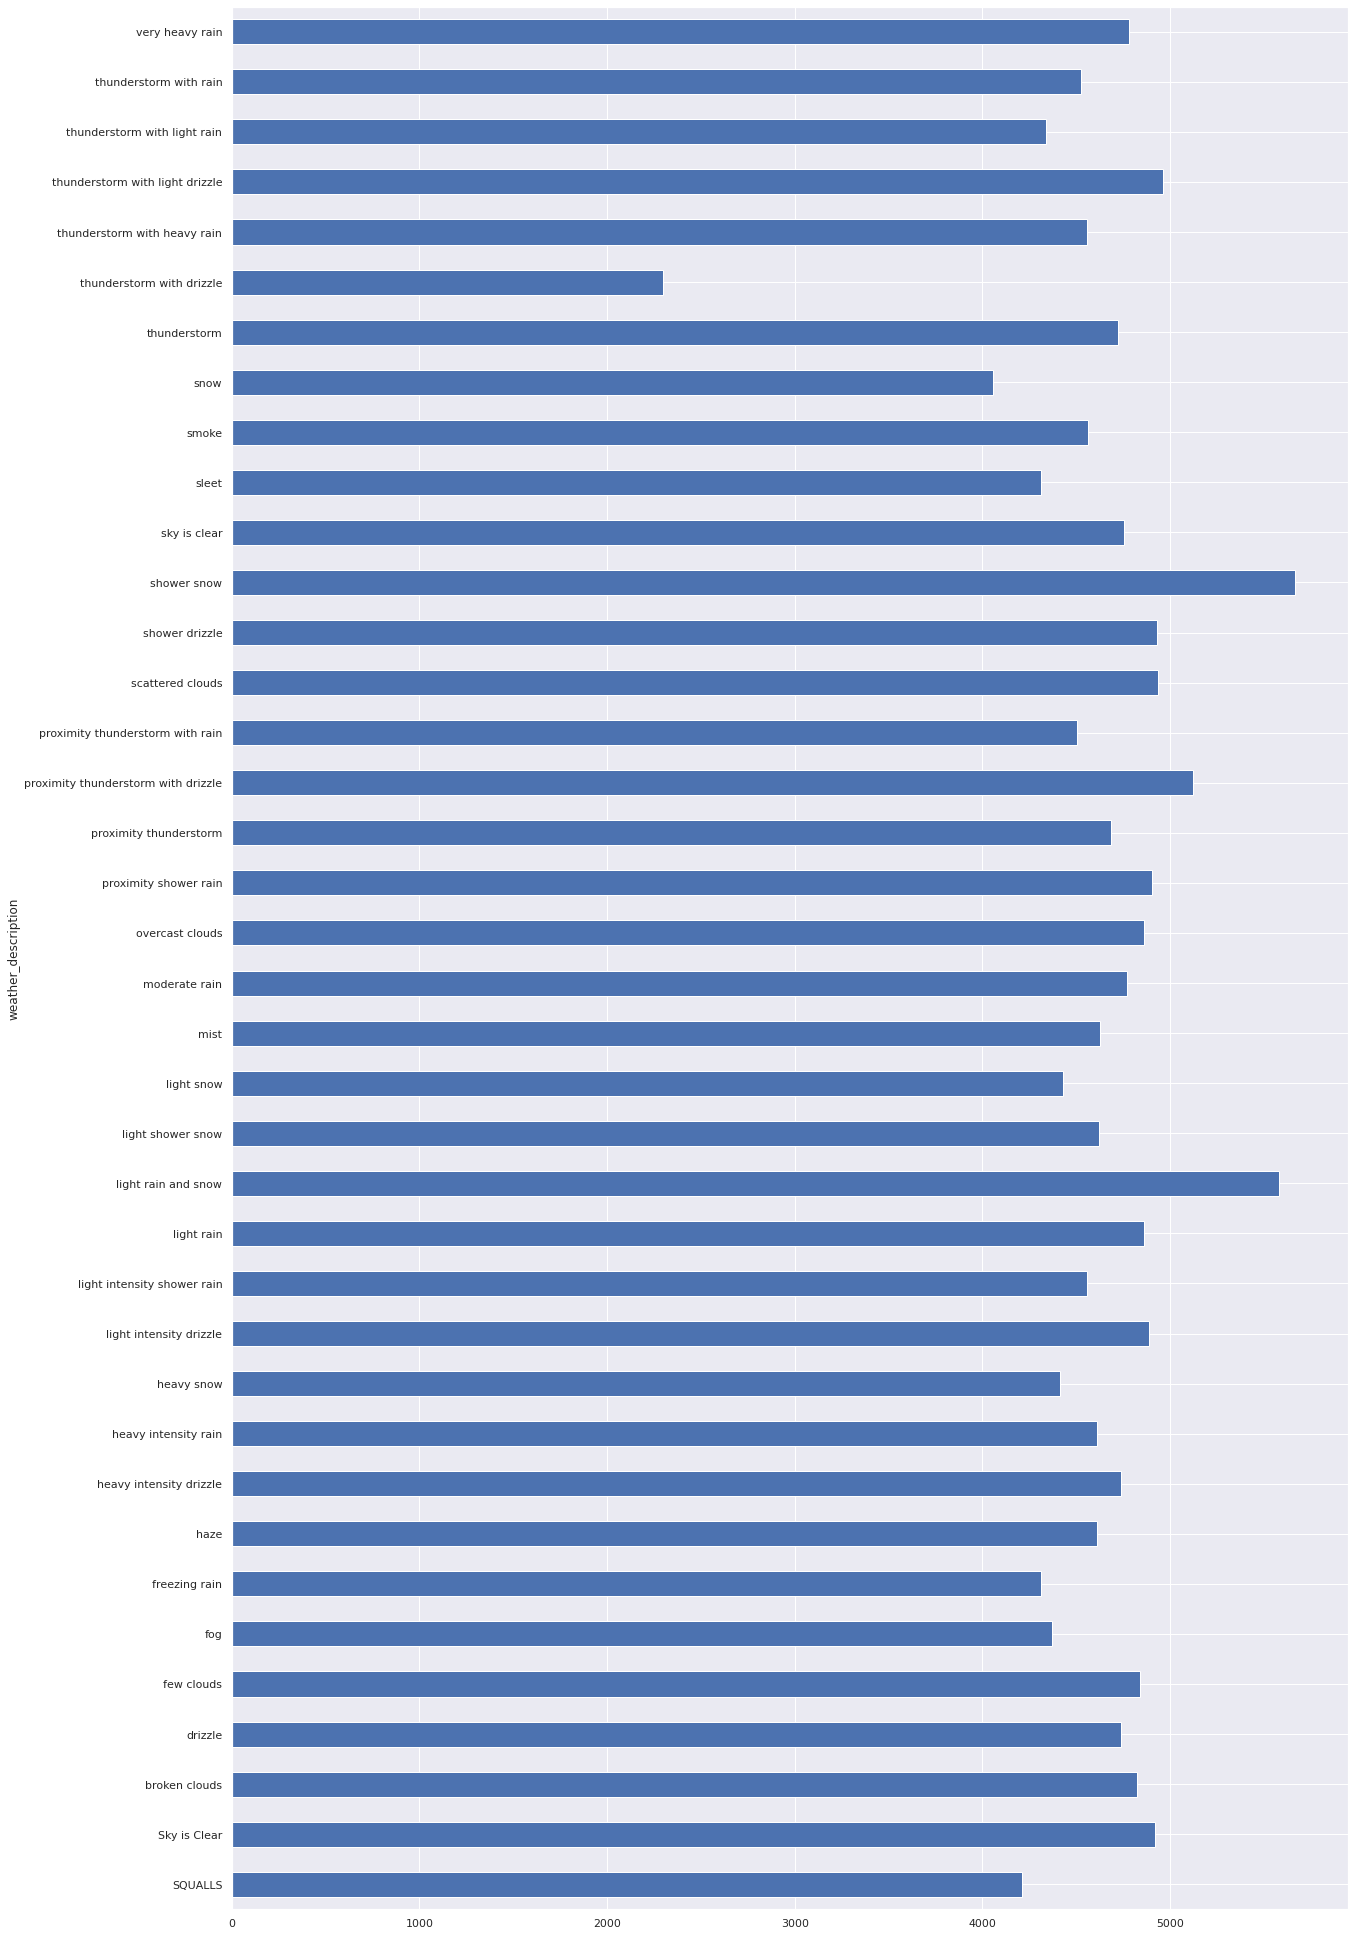

In [33]:
by_weather_description['traffic_volume'].plot.barh(figsize=(20,35))
plt.show()

However, the above is a bit difficult to read due to the amount of different weather descriptions, so I filter it to highlight only those that have a value greater than 4900:

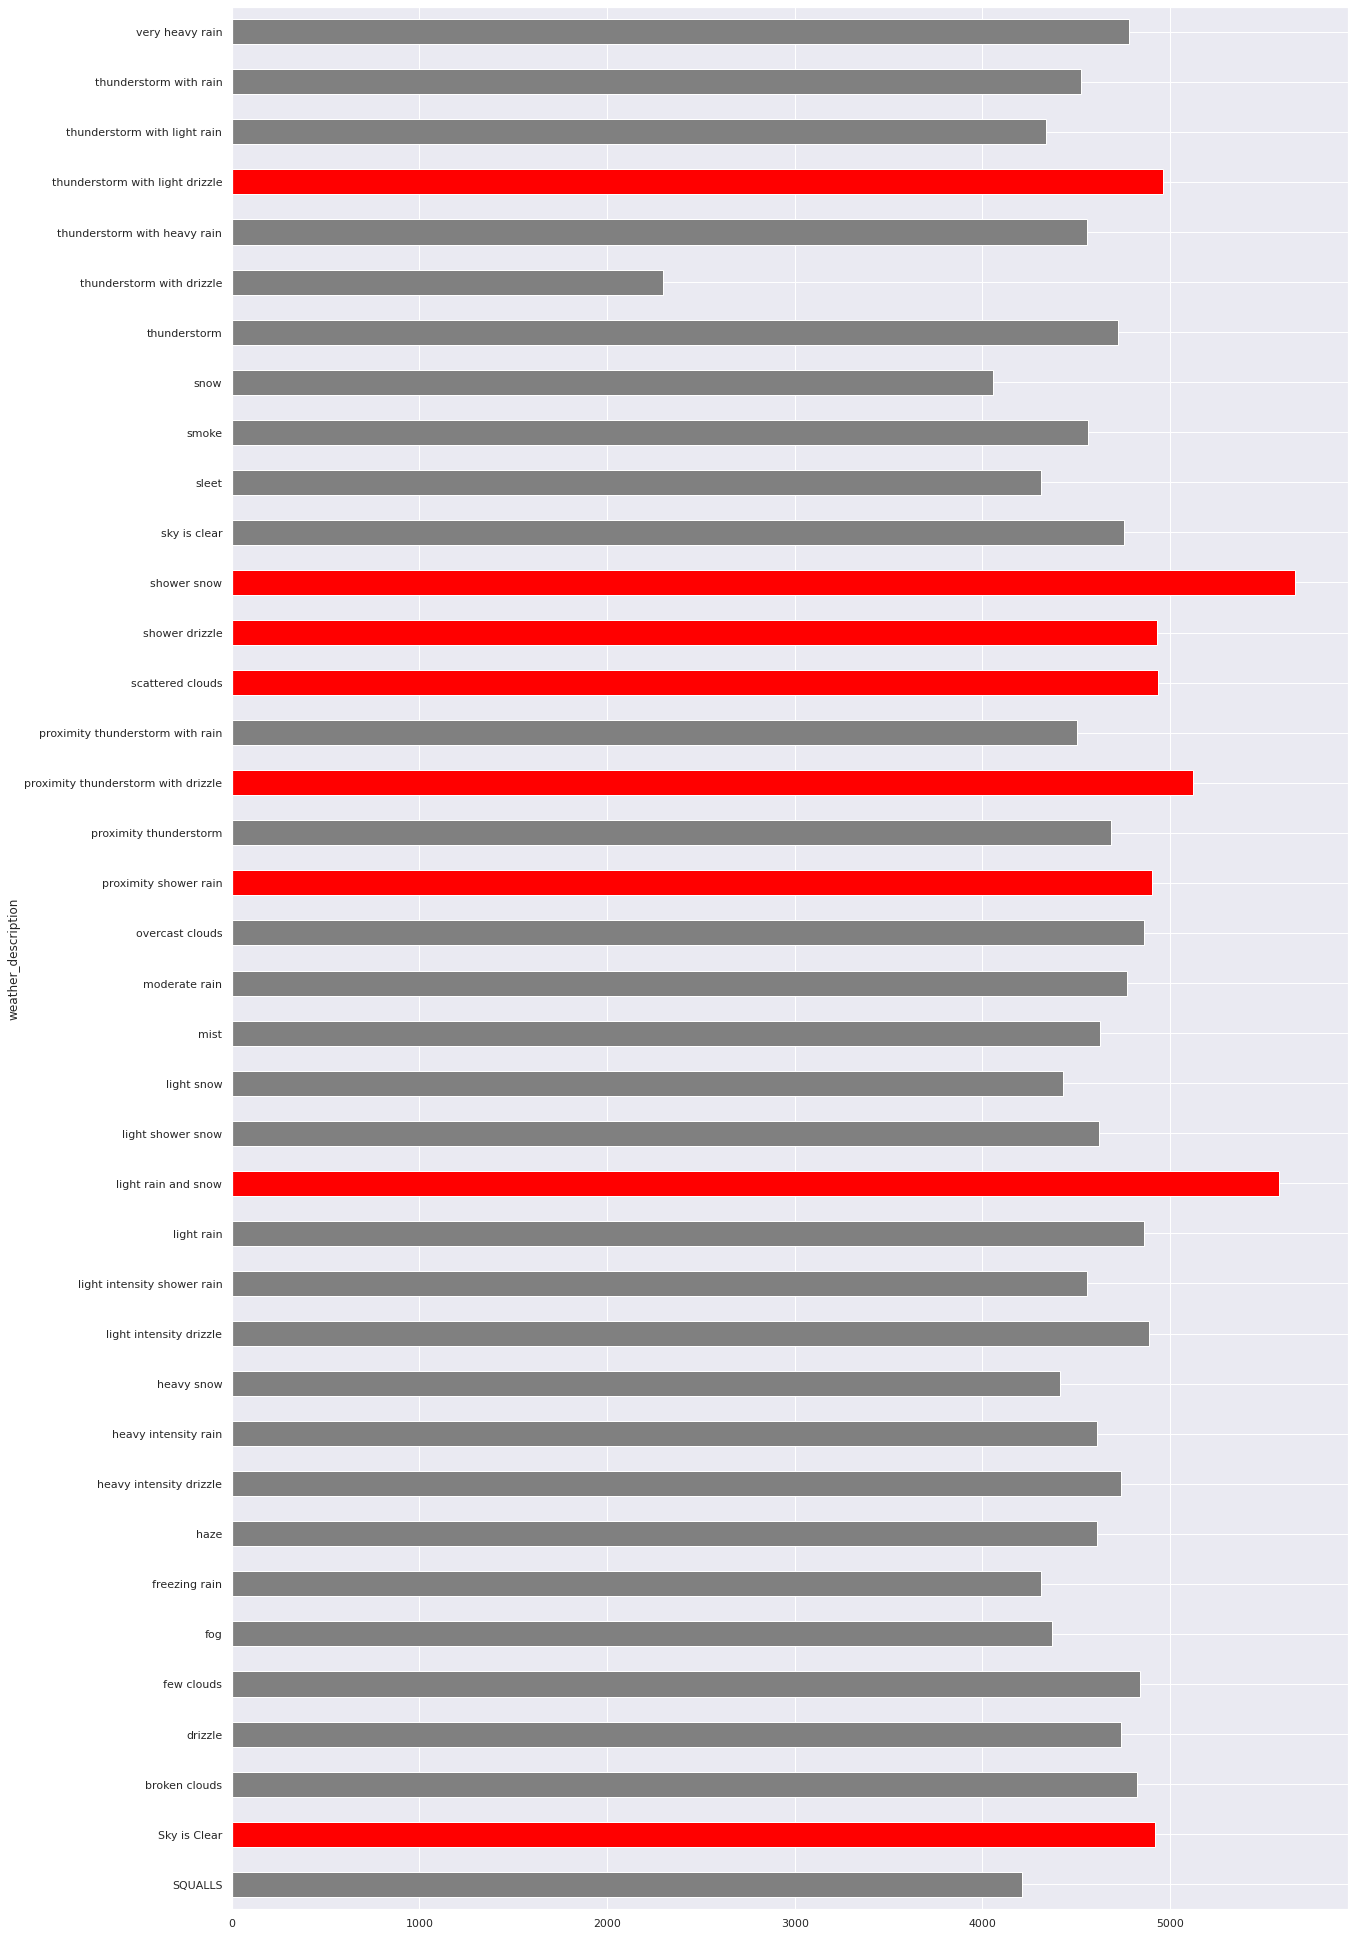

In [34]:
colors = ["red" if i > 4900 else "grey" for i in by_weather_description['traffic_volume']]
by_weather_description['traffic_volume'].plot.barh(figsize=(20,35), color=colors)
plt.show()

**Observations:**
- based on the weather descriptions, snow appears to have a greater impact on traffic, as two snow-related descriptions increase traffic >5000 cars
- proximity thunderstorms also >5000 cars in traffic
- however, 'Sky is Clear' (and other clement or neutral weather conditions) is also associated with nearly 5000 cars in traffic; this may be due to high traffic that is recorded irrespective of weather conditions e.g. during peak business hours



# Overall conclusion

- Heavy traffic is noticed during warmer months (though July seemed to record a decrease?) compared to winter months.
- Heavier traffic during the week day, compared to weekend
- Snow appears to impact traffic, causing heavier traffic
- traffic is heavy during 7am and 4pm, corresponding to typical beginning and end times of work commute

 